In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('default')

# Mission Details
Set mission timeline with main launch

In [3]:
'CHANGE'
pre_launch_range = [2025, 2033, 1] #[first year, last year, increment in years]
post_launch_range = [2034, 2053, 1] #[first year, last year, increment in years]


'do not change'
pre_launch = [pre_launch_range[0]]
index = pre_launch_range[2]
for i in range(pre_launch_range[0], pre_launch_range[1]):
    pre_launch.append(i + index)

post_launch = [post_launch_range[0]]
index = post_launch_range[2]
for i in range(post_launch_range[0], post_launch_range[1]):
    post_launch.append(i + index)

total_time = pre_launch + post_launch

# Communications

## Initial satellites

In [4]:
'CHANGE'
non_recurring = 496.9
recurring = 680.48
operations = 300.46 

mark_up = 1.15 
mass = 18405 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
initial_sat = [non_recurring, recurring, operations, mark_up, launch]

## Ground Stations

In [5]:
'CHANGE'
non_recurring = 47.93
recurring = 87.64
operations = 237.96

mark_up = 1.15 
mass = 472 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
ground_stations = [non_recurring, recurring, operations, mark_up, launch]

# Power

## Lunarsaber

In [6]:
'CHANGE'
l_non_recurring = 295.89
l_recurring = 790.09
l_operations = 237.96


mark_up = 1.15
mass = 17500 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
lunarsaber = [l_non_recurring, l_recurring, l_operations, mark_up, launch]

## FSP

In [7]:
'CHANGE'
non_recurring = 607.19
recurring = 1035.01
operations = 246.61


mark_up = 1.15
mass = 14000 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
FSP = [non_recurring, recurring, operations, mark_up, launch]

# Transportation 

## LTV

In [8]:
'CHANGE'
non_recurring = 140.47
recurring = 434.83
operations = 276.97


mark_up = 1.15
mass = 2540 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
LTV = [non_recurring, recurring, operations, mark_up, launch]

## Multi-limbed Rover

In [9]:
'CHANGE'
non_recurring = 129.19
recurring = 403.42
operations = 276.97


mark_up = 1.15
mass = 4680 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
ML_rover = [non_recurring, recurring, operations, mark_up, launch]

## RRR 

In [10]:
'CHANGE'
non_recurring = 125.16
recurring = 312.22
operations = 276.97


mark_up = 1.15
mass = 5840 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
RRR = [non_recurring, recurring, operations, mark_up, launch]

# Structures

## Sintering Equipment

In [11]:
'CHANGE'
non_recurring = 325.05
recurring = 502.88
operations = 175.64


mark_up = 1.15
mass = 4263.77 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
sinter = [non_recurring, recurring, operations, mark_up, launch]

# ISRU

## Regolith Collection Rover

In [12]:
'CHANGE'
non_recurring = 41.36
recurring = 203.36
operations = 40.83


mark_up = 1.15
mass = 462 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
RCR = [non_recurring, recurring, operations, mark_up, launch]

## Aluminum Plant

In [13]:
'CHANGE'
non_recurring = 52.51
recurring = 86.98
operations = 255.26


mark_up = 1.15
mass = 600 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
al_plant = [non_recurring, recurring, operations, mark_up, launch]

## Fuel Plant

In [14]:
'CHANGE'
non_recurring = 76.01
recurring = 198.49
operations = 258.14


mark_up = 1.15
mass = 600 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
fuel_plant = [non_recurring, recurring, operations, mark_up, launch]

## Storage

In [15]:
'CHANGE'
non_recurring = 148.09
recurring = 469.46
operations = 258.14 


mark_up = 1.15
mass = 4887 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
storage = [non_recurring, recurring, operations, mark_up, launch]

# Science

## Payload Lockers

In [16]:
'CHANGE'
non_recurring = 46.67
recurring = 63.62
operations = 107.33


mark_up = 1.15
mass = 2600 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
payload = [non_recurring, recurring, operations, mark_up, launch]

## Lunar Lab Hab

In [17]:
'CHANGE'
non_recurring = 144.08
recurring = 325.11
operations = 247.75


mark_up = 1.15
mass = 7102.4 #kg
launch = mass * 0.0001 #assume 100 dollars per kg

'do not change'
LLH = [non_recurring, recurring, operations, mark_up, launch]

# Run all systems

## Breakeven function

In [74]:
def break_even(non_recurring, recurring, operations, mark_up, pre_launch, post_launch, launch):
    
    total_cost = []
    
    #before launch
    pre_l = non_recurring / len(pre_launch)
    pre_cost = []
    
    for i in range(1, len(pre_launch) + 1):
        pre_cost.append(pre_l * i)
        total_cost.append(pre_l * i)
        

    #post launch
    post_l = (recurring + operations * 2) / len(post_launch)
    post_cost = []
    post_cost.append(pre_cost[-1] + post_l + launch)
    total_cost.append(pre_cost[-1] + post_l + launch)
    for i in range(1, len(post_launch)):
        post_cost.append(post_cost[0] + post_l * i)
        total_cost.append(post_cost[0] + post_l * i)
        
    #profit
    cost = total_cost[-1]
    profit_yearly_cost = cost / len(post_launch)
    profit_cost = []
    profit_cost.append(0)
    for i in range(1, len(post_launch)):
        profit_cost.append(profit_yearly_cost * i)
    
    mark_up_cost = [mark_up * i for i in profit_cost]
    
    pure_profit = np.subtract(mark_up_cost, profit_cost)
        
    
    return pre_cost, post_cost, total_cost, pure_profit, mark_up_cost

In [213]:
'do not change'
def run_costs(system):
    contract = 1.1 #assume contract goes over by 20%
    non_recurring = system[0] * contract
    recurring = system[1] * contract
    operations = system[2] * contract
    mark_up = 1.20 #system[3] #uncomment if different markups are used for each system
    launch = system[4] * contract
    
    pre_cost, post_cost, total_cost, mark_up_cost, pure_profit = break_even(non_recurring, recurring, operations, 
                                mark_up, pre_launch, post_launch, launch)
    
    return total_cost, pure_profit, mark_up_cost

In [214]:
'Edit list to reflect systems'
s_list = [initial_sat, ground_stations, 
          lunarsaber, FSP, 
          LTV, ML_rover, RRR, 
          sinter, 
          RCR, al_plant, fuel_plant,
          payload, LLH, storage]

'do not change'
total_cost_list = []
pure_profit_list = []
total_cost_list1 = []
pure_profit_list1 = []
mark_up_list = []
mark_up_list1 = []


for s in s_list:
    total_cost, pure_profit, mark_up_cost = run_costs(s)
    total_cost_list.append(total_cost)
    pure_profit_list.append(pure_profit)
    mark_up_list.append(mark_up_cost)

# Plotting

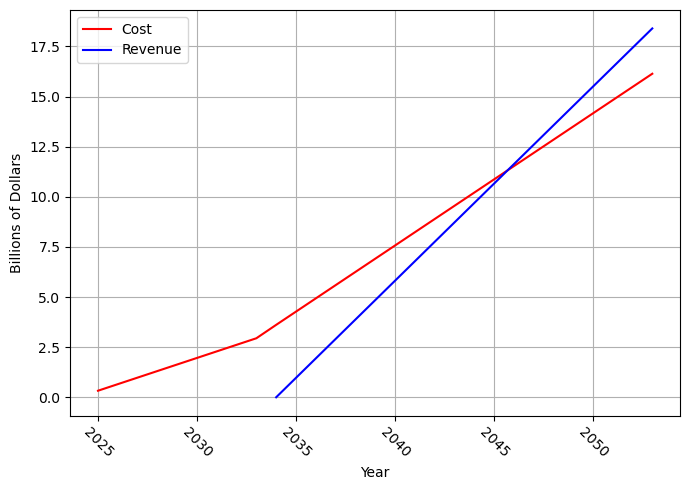

In [215]:
# total_cost_list = total_cost_list1
# pure_profit_list = pure_profit_list1
# mark_up_list = mark_up_list1

cost_zip = zip(total_cost_list[0], total_cost_list[1], total_cost_list[2],
              total_cost_list[3], total_cost_list[4], total_cost_list[5],
              total_cost_list[6], total_cost_list[7], total_cost_list[8],
              total_cost_list[9], total_cost_list[10], total_cost_list[11],
              total_cost_list[12], total_cost_list[13])
system_costs = [sum(x)/1000 for x in cost_zip]
# system_costs = [x/1000 for x in system_costs]

profit_zip = zip(pure_profit_list[0], pure_profit_list[1], pure_profit_list[2],
              pure_profit_list[3], pure_profit_list[4], pure_profit_list[5],
              pure_profit_list[6], pure_profit_list[7], pure_profit_list[8],
              pure_profit_list[9], pure_profit_list[10], pure_profit_list[11],
              pure_profit_list[12], pure_profit_list[13])
profit_costs = [sum(x)/1000 for x in profit_zip]

revenue_zip = zip(mark_up_list[0], mark_up_list[1], mark_up_list[2],
              mark_up_list[3], mark_up_list[4], mark_up_list[5],
              mark_up_list[6], mark_up_list[7], mark_up_list[8],
              mark_up_list[9], mark_up_list[10], mark_up_list[11],
              mark_up_list[12], mark_up_list[13])
revenue = [sum(x)/1000 for x in revenue_zip]

x = [2045, 2045]
y = [0, 7.5]


fig = plt.figure(figsize=(7, 5), tight_layout=True)
ax1 = fig.add_subplot(111)
ax1.plot(total_time, system_costs, 'r', label='Cost')
ax1.plot(post_launch, revenue, 'b', label='Revenue')
# ax1.plot(x, y, 'k--', label='Break Even Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Billions of Dollars')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()
plt.savefig('theia_1.1_0.20.png', dpi=250)

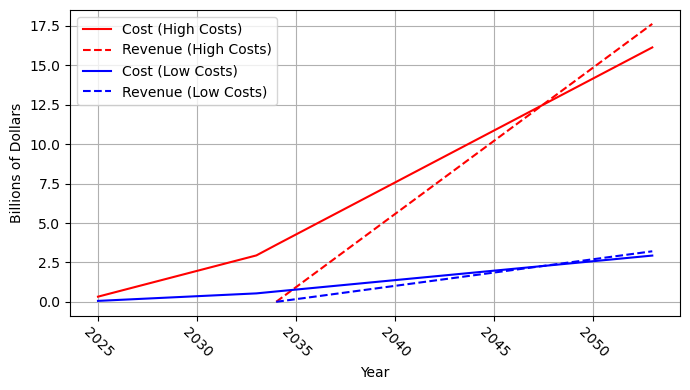

In [174]:


fig = plt.figure(figsize=(7, 4), tight_layout=True)
ax1 = fig.add_subplot(111)
ax1.plot(total_time, system_costs, 'r', label='Cost (High Costs)')
ax1.plot(post_launch, revenue, 'r--', label='Revenue (High Costs)')
ax1.plot(total_time, system_costs1, 'b', label='Cost (Low Costs)')
ax1.plot(post_launch, revenue1, 'b--', label='Revenue (Low Costs)')
# ax1.plot(x, y, 'k--', label='Break Even Year: 2036')
ax1.set_xlabel('Year')
ax1.set_ylabel('Billions of Dollars')
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()
plt.savefig('theia_money.png', dpi=250)

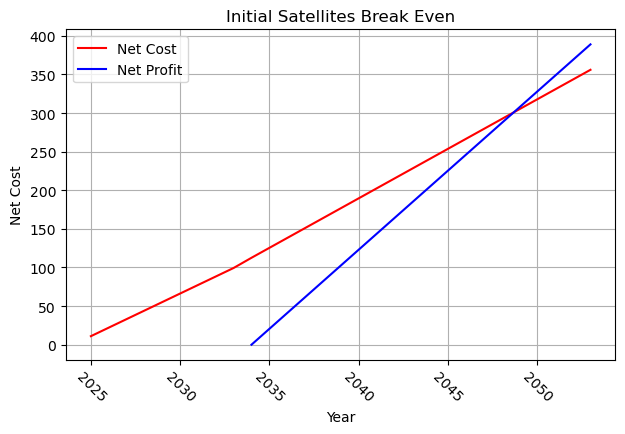

In [175]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[0], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[0], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('Initial Satellites Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()


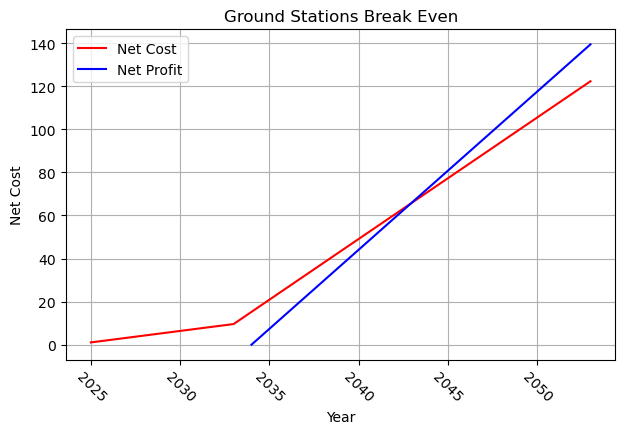

In [136]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[1], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[1], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('Ground Stations Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()


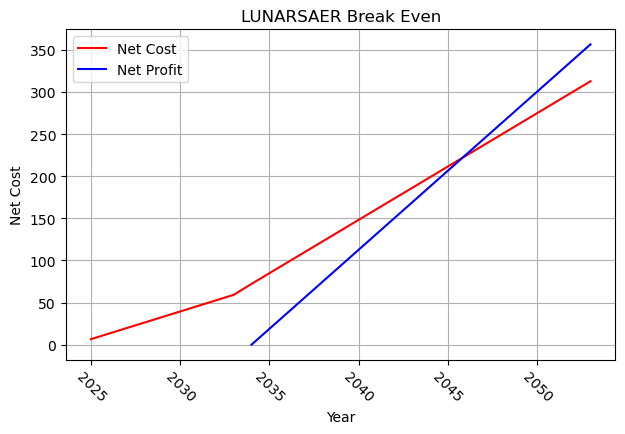

In [137]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[2], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[2], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('LUNARSAER Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()


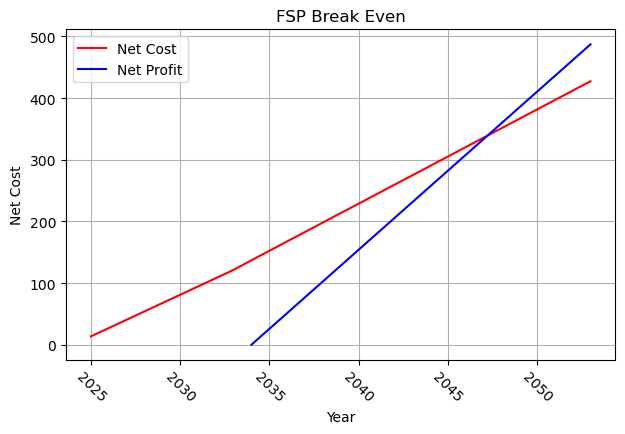

In [138]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[3], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[3], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('FSP Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()


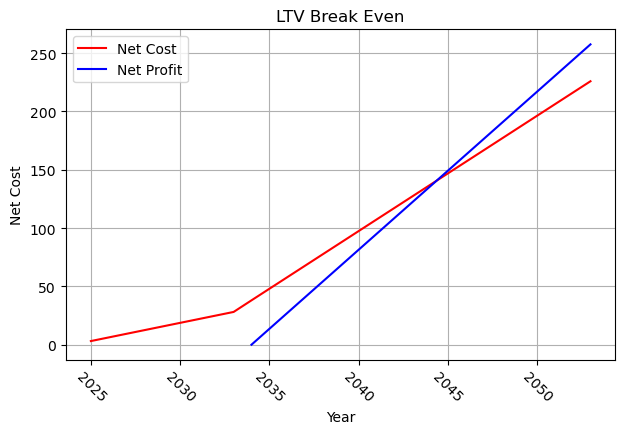

In [139]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[4], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[4], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('LTV Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()


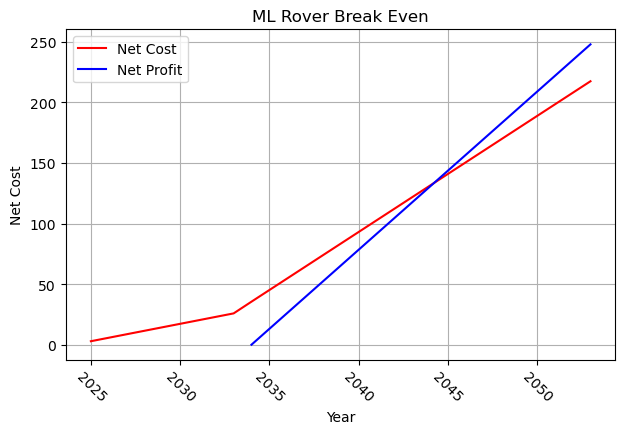

In [140]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[5], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[5], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('ML Rover Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()


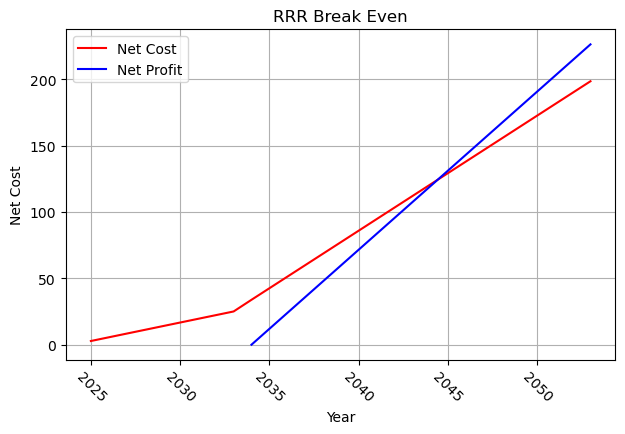

In [141]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[6], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[6], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('RRR Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()


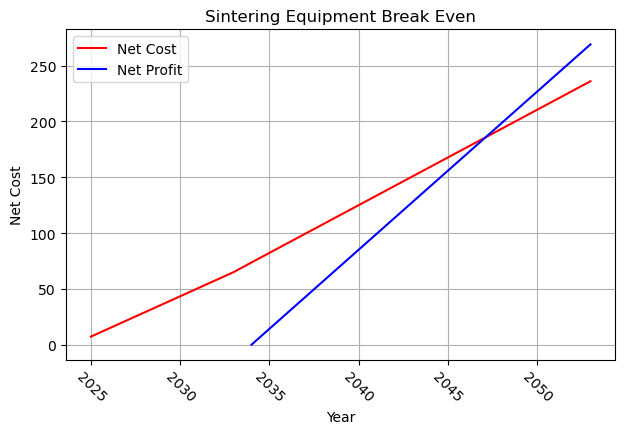

In [142]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[7], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[7], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('Sintering Equipment Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()


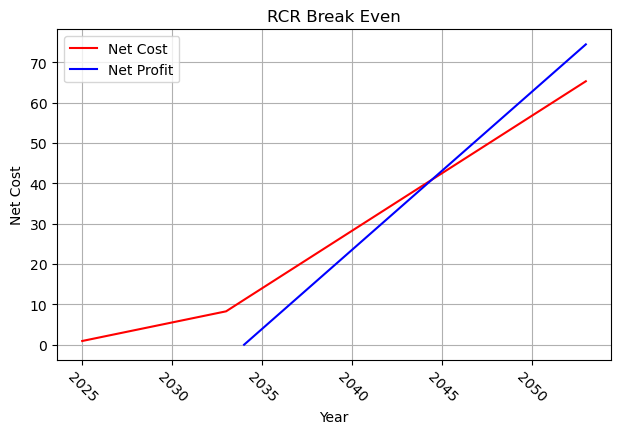

In [143]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[8], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[8], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('RCR Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()

rcr_cost = total_cost_list[8]
rcr_profit = pure_profit_list[8]
rcr_markup = mark_up_list[8]

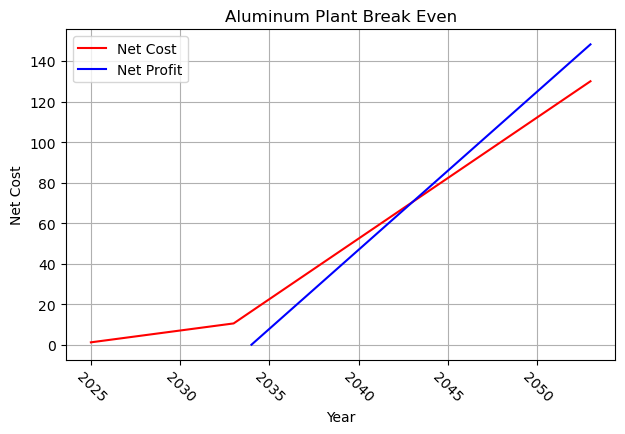

In [144]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[9], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[9], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('Aluminum Plant Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()

al_cost = total_cost_list[9]
al_profit = pure_profit_list[9]
al_markup = mark_up_list[9]

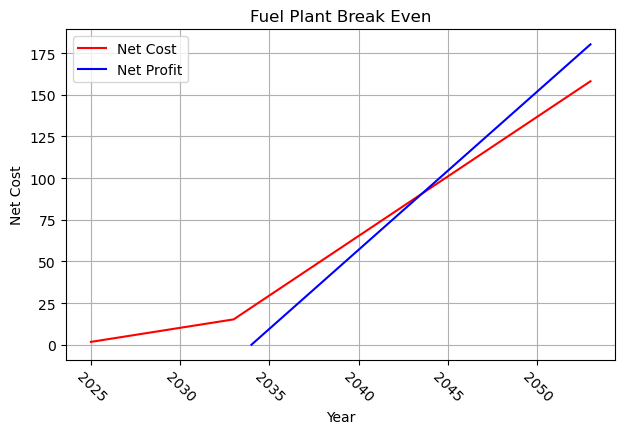

In [145]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[10], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[10], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('Fuel Plant Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()

fuel_cost = total_cost_list[10]
fuel_profit = pure_profit_list[10]
fuel_markup = mark_up_list[10]

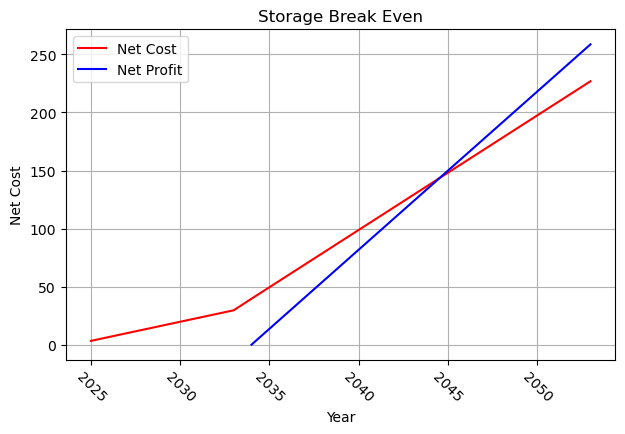

In [146]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[13], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[13], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('Storage Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()


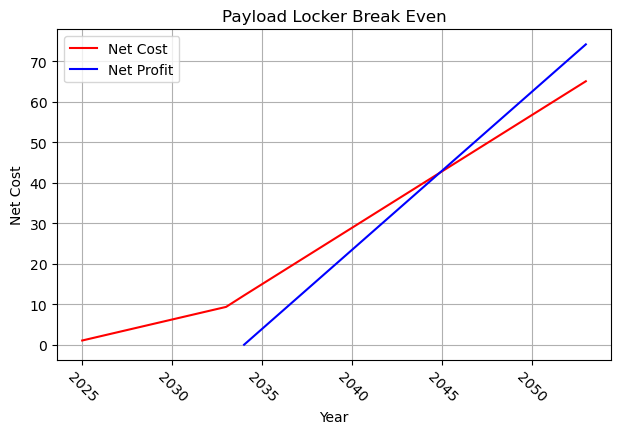

In [147]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[11], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[11], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('Payload Locker Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()


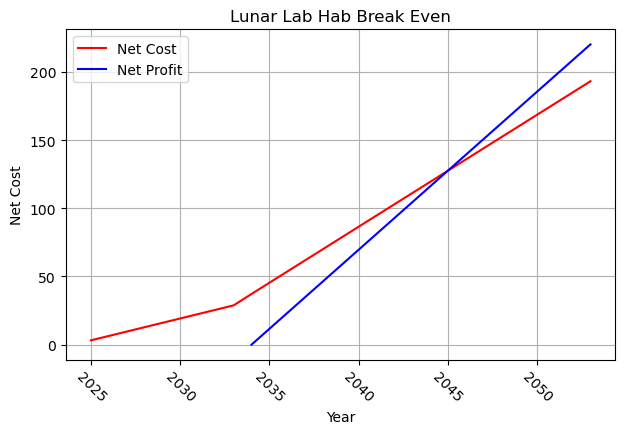

In [148]:
fig = plt.figure(figsize=(12, 12), tight_layout=True)
ax1 = fig.add_subplot(321)
ax1.plot(total_time, total_cost_list[12], 'r', label='Net Cost')
ax1.plot(post_launch, mark_up_list[12], 'b', label='Net Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Net Cost')
ax1.set_title('Lunar Lab Hab Break Even')
# ax1.set_xticks(total_time)
ax1.tick_params(axis='x', labelrotation=-45)
ax1.grid()
ax1.legend()


### ISRU material costs

In [133]:
#AL costs

rcr_cost = [2 * x / 7 for x in total_cost_list[8]]
rcr_profit = [2 * x / 7 for x in pure_profit_list[8]]
rcr_markup = [2 * x / 7 for x in mark_up_list[8]]


al_cost = [sum(x) for x in zip(total_cost_list[9], rcr_cost)]
al_profit = [sum(x) for x in zip(pure_profit_list[9], rcr_profit)]
al_markup = [sum(x) * 1000000 for x in zip(mark_up_list[9], rcr_markup)]

produced = 7500 + 8000 + 6000
# al_amt = 7500 / produced
# si_amt = 8000 / produced
# ca_amt = 6000 / produced

al_price = [x / produced for x in al_markup]


print(al_price[1]) #dollar/kg
print('total cost (dollars):', al_markup[1])

414.8844438538206
total cost (dollars) 8920015.542857142


In [154]:
#Fuel cost
rcr_cost = [5 * x / 7 for x in total_cost_list[8]]
rcr_profit = [5 * x / 7 for x in pure_profit_list[8]]
rcr_markup = [5 * x / 7 for x in mark_up_list[8]]

fuel_cost = [sum(x) for x in zip(total_cost_list[10], rcr_cost)]
fuel_profit = [sum(x) for x in zip(pure_profit_list[10], rcr_profit)]
fuel_markup = [sum(x)*100000 for x in zip(mark_up_list[10], rcr_markup)]

produced = 50000 + 7100 + 200000 #methane, hydrogen, oxygen

fuel_price = [x / produced for x in fuel_markup]

print(fuel_price[1])
print('total cost (dollars):', fuel_markup[1])

4.7794705784297395
total cost (dollars): 1228801.885714286
